In [2]:
import scipy
from scipy import ndimage
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.signal import find_peaks
from skimage.morphology import skeletonize
from skimage import util 
from skimage import measure
from skimage import filters
from skimage import data
from skimage import exposure 
from skimage import io
import pandas as pd
import os
import os.path
from datetime import datetime
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def autophagosome_size(img):
    im= np.array(img)!=2
    mask, number_of_objects = ndimage.label(im)
    all_labels = measure.label(mask)
    props = measure.regionprops(all_labels) 
    area=[] 
    for i in range (0,number_of_objects): 
        if props[i].area > 2 and props[i].area < 1500:
            area=np.append(area,props[i].area)
        area=np.reshape(area, (-1, 1))
     ### size thresholding can be inroduced here
    if number_of_objects is not 0: return number_of_objects,area.mean(),area
    if number_of_objects is 0: return number_of_objects,number_of_objects,area

## Measure autophagosome properties

area=[]
for i in range (0,number_of_objects):
    area=np.append(area,props[i].area)

In [4]:
experiments = os.listdir(os. getcwd())
for item in experiments:
    if 'raph' not in item : experiments.remove(item)
experiments.remove('.ipynb_checkpoints')
#experiments.remove('Statistical_Analysis.ipynb')
experiments.remove('Measure_and _Plot.ipynb')
experiments.remove('train')
experiments.remove('Results')
experiments

['Graph10_BoiPy__60xWater',
 'Graph11_ER__60xWater',
 'Graph12_Golgi__60xWater',
 'Graph14_Atg8a_Epistase_time_Of_Woud_Healing__40x',
 'Graph15_Atg8a_Insulin_Foxo_time_Of_Woud_Healing__40x_and_60x',
 'Graph16_Atg8a_Foxo_TM_time_Of_Woud_Healing__40xOil',
 'Graph17_Atg8a_time_Of_Woud_Healing__40xOil',
 'Graph1_Geraf2__Atg8a__40xOil_rest_of_data',
 'Graph3_Atg8a_Epistase__40xOil',
 'Graph4_Graph5_Atg8a_Chloroquine_you.have.all.images',
 'Graph6_Graph7_LAMP1.GFP__60xWater',
 'Graph8_Graph9_GFP.LAMP1__60xWater']

In [10]:
images_dir = 'train/label/'
output_csv_dir = 'Results/'
os.makedirs(output_csv_dir, exist_ok=True)
results_all = pd.DataFrame(columns=['experiment','condition','image_name','number_of_objects','mean_area'])

for experiment in experiments:
    conditions = os.listdir(experiment)
    if '.DS_Store' in conditions: conditions.remove('.DS_Store')
    if 'Screenshot_1.png' in conditions: conditions.remove('Screenshot_1.png')
    pooled_cell_sizes_expt=pd.DataFrame()
    mean_cell_sizes_expt=pd.DataFrame()###
    mean_cell_numbers_expt=pd.DataFrame()
    for condition in conditions:
        data_path = str(experiment+'/'+condition)
        images = os.listdir(data_path)
        if '.DS_Store' in images: images.remove('.DS_Store')
        if '0_tif_RGB' in images: images.remove('0_tif_RGB')
        if '200331_Figure_Atg8a_Chloroquine.jpg' in images: images.remove('200331_Figure_Atg8a_Chloroquine.jpg')
        pooled_cell_sizes =[]
        mean_cell_sizes=[]###
        mean_cell_numbers=[]
        for image_name in images:
            file_name = str(experiment)+'_'+str(condition)+'_'+str(image_name)#+'_Simple_Segmentation'
            if file_name.endswith('.tif'):file_name = file_name[:-4].__add__('_Simple Segmentation.tif')
            elif file_name.endswith('.tiff'):file_name = file_name[:-5].__add__('_Simple Segmentation.tif')
            image = io.imread(os.path.join(images_dir, file_name), plugin='pil')
            
            number_of_objects,mean_area,area_all_objects = autophagosome_size(image)
            
            mean_cell_sizes=np.append(mean_cell_sizes,mean_area)###
            mean_cell_numbers=np.append(mean_cell_numbers,number_of_objects)
            pooled_cell_sizes=np.append(pooled_cell_sizes,area_all_objects)
            results_all = results_all.append({'experiment': str(experiment), 'condition':str(condition), 'image_name': str(image_name), 'number_of_objects':number_of_objects,'mean_area': mean_area},ignore_index=True)

        pooled_cell_sizes_data = np.reshape(pooled_cell_sizes, (-1, 1))
        pooled_cell_sizes_df = pd.DataFrame(data=pooled_cell_sizes_data, index=None, columns=[str(condition)])
        pooled_cell_sizes_expt = pd.concat([pooled_cell_sizes_df,pooled_cell_sizes_expt], axis=1,join='outer')
        
        mean_cell_numbers_data = np.reshape(mean_cell_numbers, (-1, 1))
        mean_cell_numbers_df = pd.DataFrame(data=mean_cell_numbers_data, index=None, columns=[str(condition)])
        mean_cell_numbers_expt = pd.concat([mean_cell_numbers_df,mean_cell_numbers_expt], axis=1,join='outer')#### 
        
        mean_cell_sizes_data = np.reshape(mean_cell_sizes, (-1, 1))
        mean_cell_sizes_df = pd.DataFrame(data=mean_cell_sizes_data, index=None, columns=[str(condition)])
        mean_cell_sizes_expt = pd.concat([mean_cell_sizes_df,mean_cell_sizes_expt], axis=1,join='outer')####       
        
    pooled_cell_sizes_expt.to_csv(output_csv_dir+experiment+'_pooled_cell_sizes.csv', sep=';', decimal=',')
    mean_cell_sizes_expt.to_csv(output_csv_dir+experiment+'_mean_cell_sizes.csv', sep=';', decimal=',')####
    mean_cell_numbers_expt.to_csv(output_csv_dir+experiment+'_mean_cell_numbers.csv', sep=';', decimal=',')
    print(experiment+' DONE')
results_all.to_csv(output_csv_dir+'results_all_'+str(datetime.now())+'.csv', sep=';', decimal=',')
results_all.to_csv(output_csv_dir+'results_all.csv', sep=';', decimal=',')
print('ALL DONE')

Graph10_BoiPy__60xWater DONE
Graph11_ER__60xWater DONE
Graph12_Golgi__60xWater DONE
Graph14_Atg8a_Epistase_time_Of_Woud_Healing__40x DONE
Graph15_Atg8a_Insulin_Foxo_time_Of_Woud_Healing__40x_and_60x DONE
Graph16_Atg8a_Foxo_TM_time_Of_Woud_Healing__40xOil DONE
Graph17_Atg8a_time_Of_Woud_Healing__40xOil DONE
Graph1_Geraf2__Atg8a__40xOil_rest_of_data DONE


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':


Graph3_Atg8a_Epistase__40xOil DONE
Graph4_Graph5_Atg8a_Chloroquine_you.have.all.images DONE
Graph6_Graph7_LAMP1.GFP__60xWater DONE
Graph8_Graph9_GFP.LAMP1__60xWater DONE
ALL DONE


In [ ]:
results_all=pd.read_csv(output_csv_dir+'results_all_2020-08-30-2.csv', sep=';', decimal=',')
results_all.head()

## PLOT NUMBER OF OBJECTS

In [ ]:

import seaborn as sns
for experiment in experiments:
    experiment_data = results_all[results_all['experiment']==experiment] 
    fig,ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax = sns.boxplot(x="condition", y="number_of_objects", data=experiment_data)
    ax = sns.swarmplot(x="condition", y="number_of_objects", data=experiment_data, color=".25")
    plt.xticks(rotation=90)
    plt.title(experiment)
    plt.savefig(output_csv_dir+experiment+'_number_of_objects.png',bbox_inches='tight')
    plt.show()

## PLOT SIZE OF OBJECTS/ MEAN_AREA

In [ ]:


for experiment in experiments:
    experiment_data = results_all[results_all['experiment']==experiment] 
    fig,ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax = sns.boxplot(x="condition", y="mean_area", data=experiment_data)
    ax = sns.swarmplot(x="condition", y="mean_area", data=experiment_data, color=".25")
    plt.xticks(rotation=90)
    plt.ylabel('mean_area ($\mu$m$^{2}$)')
    plt.title(experiment)
    plt.savefig(output_csv_dir+experiment+'_mean_area.png',bbox_inches='tight')
    plt.show()

## PLOT POOLED SIZE OF OBJECTS/ MEAN_AREA

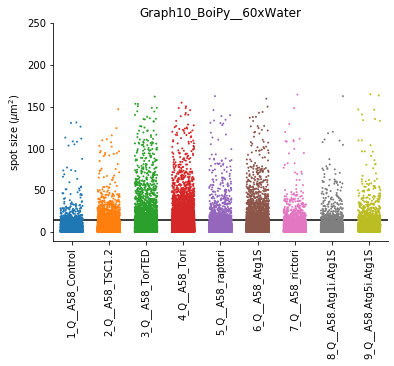

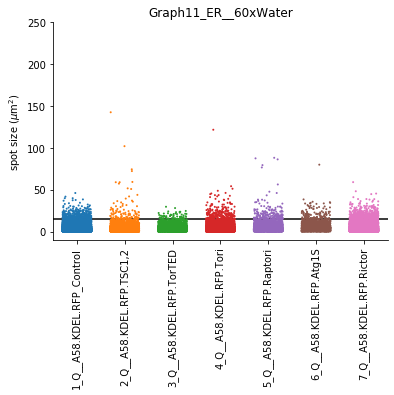

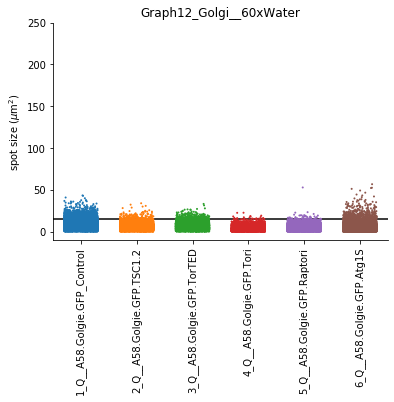

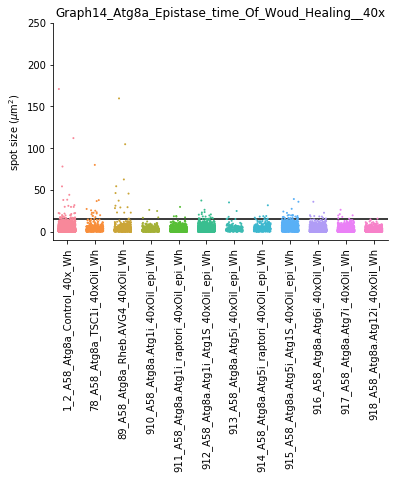

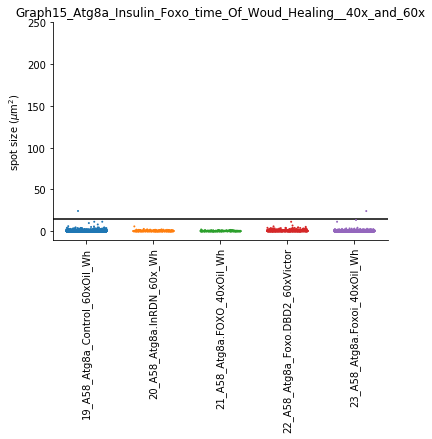

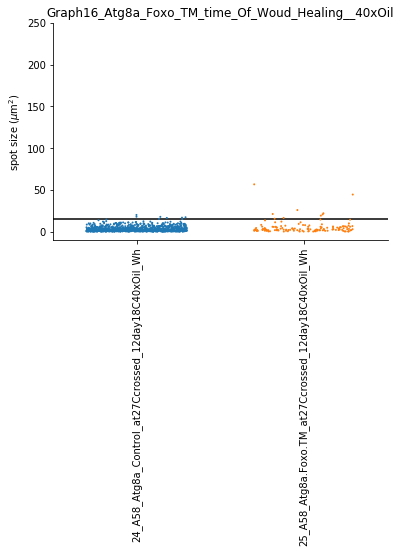

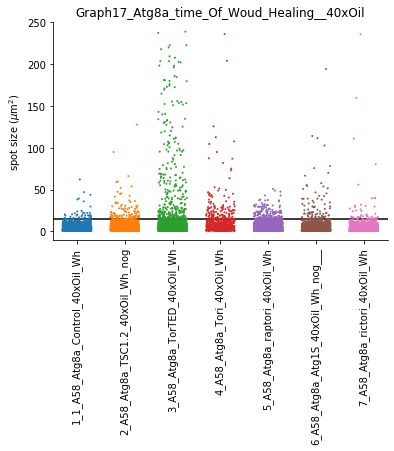

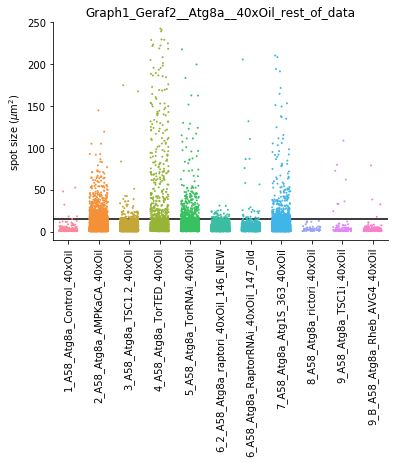

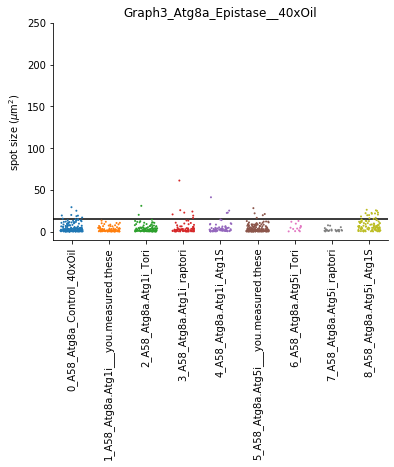

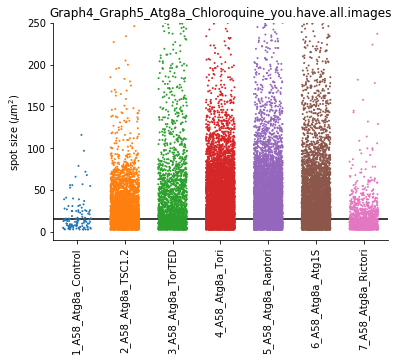

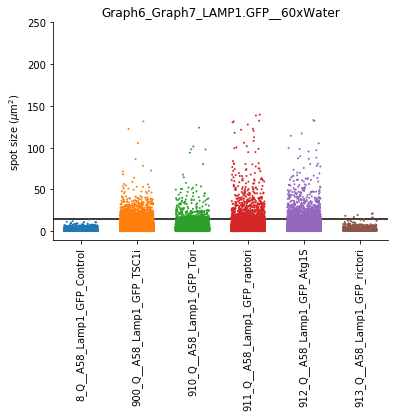

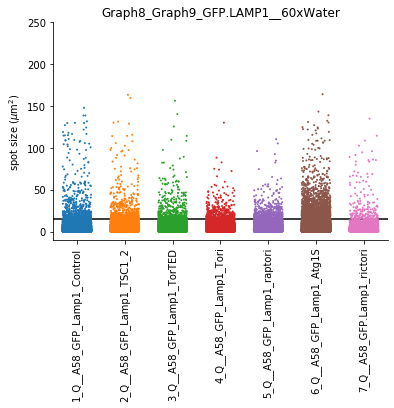

In [8]:
output_csv_dir = 'Results/'
for experiment in experiments:
    df=pd.read_csv(output_csv_dir+experiment+'_pooled_cell_sizes.csv', sep=';', decimal=',')
    df = df.drop(columns=['Unnamed: 0'])
    df = df.sort_index(axis=1)
    
    
    if '60x' in str(experiment):df=df*0.1111
    if '40x' in str(experiment):df=df*0.1626
    
    fig,ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax = sns.stripplot(data=df, jitter=0.3,size=2)
    plt.xticks(rotation=90)
    plt.ylabel('spot size ($\mu$m$^{2}$)')
    plt.ylim(-10,250)
    plt.title(experiment)
    plt.axhline(y=15,color='k')
    plt.savefig(output_csv_dir+experiment+'_pooled_cell_sizes.png',bbox_inches='tight')
    plt.show()

In [ ]:
df.head()

In [7]:
def get_concat_h_multi_resize(im_list, resample=Image.BICUBIC):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst

In [8]:
## CONCATANATE GRAPHS

plot_dir = 'Results/'
for experiment in experiments:
    print(experiment)
    im1 = Image.open(os.path.join(plot_dir, experiment+'_number_of_objects.png'))
    im2 = Image.open(os.path.join(plot_dir, experiment+'_mean_area.png'))
    im3 = Image.open(os.path.join(plot_dir, experiment+'_pooled_cell_sizes.png'))
    get_concat_h_multi_resize([im1, im2, im3]).save('Results/'+experiment+'_concat.jpg')

Graph10_BoiPy__60xWater
Graph11_ER__60xWater
Graph12_Golgi__60xWater
Graph14_Atg8a_Epistase_time_Of_Woud_Healing__40x
Graph15_Atg8a_Insulin_Foxo_time_Of_Woud_Healing__40x_and_60x
Graph16_Atg8a_Foxo_TM_time_Of_Woud_Healing__40xOil
Graph17_Atg8a_time_Of_Woud_Healing__40xOil
Graph1_Geraf2__Atg8a__40xOil_rest_of_data
Graph3_Atg8a_Epistase__40xOil
Graph4_Graph5_Atg8a_Chloroquine_you.have.all.images
Graph6_Graph7_LAMP1.GFP__60xWater
Graph8_Graph9_GFP.LAMP1__60xWater
